#  Python for Economic and Social Data Science: Lecture Four

### 18th July, 2024
---

Lets now run the homework randomiser again, where each randomly selected student will answer some of the homework questions!

## 16 Matplotlib

The attractiveness of Matplotlib lies in the fact that it is widely considered to be a perfect alternative to
MATLAB, if it is used in combination with Numpy and Scipy. Whereas MATLAB is expensive and closed source, Matplotlib is free and open source code. It is also object-oriented and can be used in an object oriented way. Matplotlib can be used to create publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

The key message of the Matplotlib website states:

```
matplotlib tries to make easy things easy and hard things possible
```

We will use the `pyplot` submodule of `matplotlib`. `pyplot` provides a procedural interface to the object-oriented plotting library of matplotlib. Its plotting commands are chosen in a way that they are similar to Matlab both in naming and with the arguments.

### 16.1 Basic Examples

Lets see our first basic example of how to use matplotlib:

In [1]:
import matplotlib.pyplot as plt

And then, our first plot:

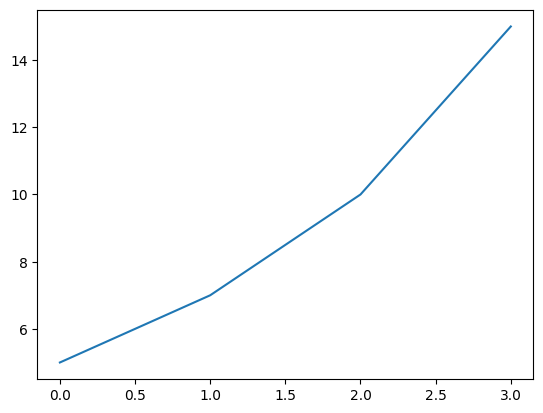

In [2]:
plt.plot([5, 7, 10, 15])

The graph is continuous, but we might want red markers for this discrete data:

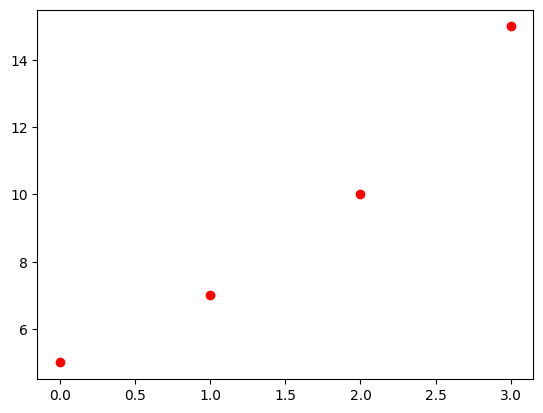

In [3]:
plt.plot([5, 7, 10, 15], 'or')

### 16.2 Two main approaches

#### 16.2.1 Using pyplot directly

There are two main approaches to creating plots in Matplotlib:

Using the pyplot module (plt): This is the state-based interface to Matplotlib and works similarly to MATLAB. It keeps track of the current figure and axes, making it very simple to create plots quickly. This approach involves calling functions directly from the pyplot module. It's straightforward and concise, making it ideal for simple and quick visualizations:

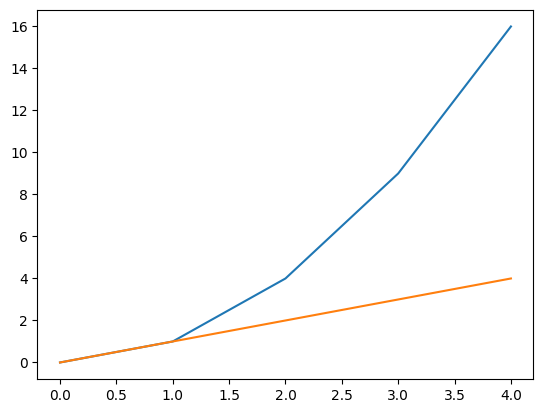

In [4]:
y1 = [0, 1, 4, 9, 16]
y2 = [0, 1, 2, 3, 4]
plt.plot(y1, label='Quadratic')
plt.plot(y2, label='Linear')

#### 16.2.2 The object orientated approach

The other way is to use the object orientated approach: (fig, ax). This approach provides more control and customization by explicitly creating figure and axes objects. It is particularly useful when you want to create more complex or multi-plot figures. 

This method involves explicitly creating figure and axes objects, which allows for more customization and control, especially useful for more complex plots:

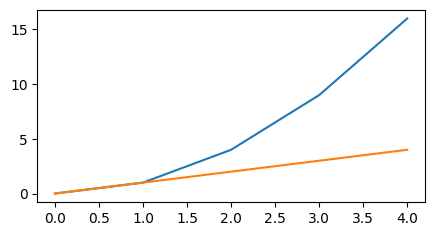

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 2.5))
ax1.plot(y1)
ax1.plot(y2)

A couple of things to note here: note how the subplots allows us to specify the number of subfigures in our plot, and also note how it allows us to vary the figsize:

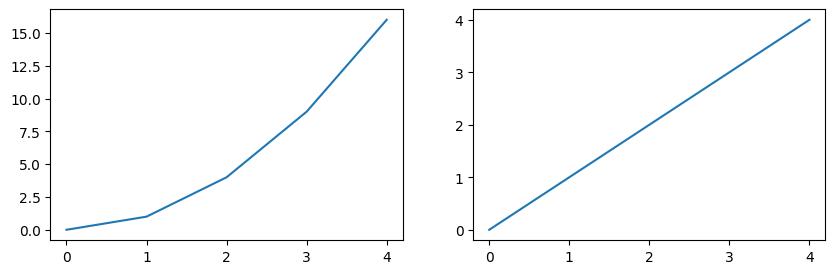

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(y1)
ax2.plot(y2)

The top of the tree-like structure of matplotlib objects is the figure object. A figure can be seen as the container which contains one or more plots. The plots are called axes in matplotlib jargon. Axes is the plural of the word "axis", which gives us a misleading idea. We can think about "axes" as a synonym for the word "plot"

In general, we are going to stick to this more object orientated approach, as it's our goal to create more complex figures.

### 16.2 Plot types

Lets now introduce some other very basic plot types, before we move on to styling and more advanced plot types.



#### 16.2.1 Line Graphs

Well, we've already seen the default plotting behaviour of matplotlib above:

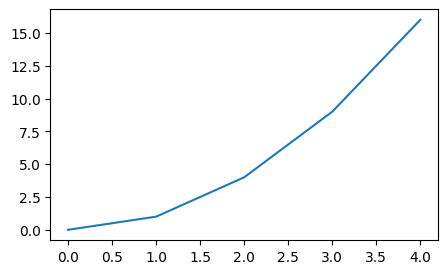

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))
ax1.plot([0, 1, 4, 9, 16])

#### 16.2.2 Scatter Graphs

And for a scatter plot with markers (can you identify how similar this is to plotting a line graph, conceptually?):

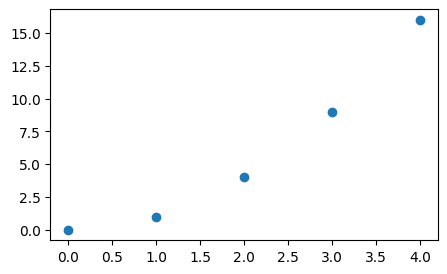

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))
ax1.plot([0, 1, 4, 9, 16], 'o') # what happens if we specify "marker='o'?"

#### 16.2.3 Bar charts

A very simple example of plotting bar charts follows below:

<BarContainer object of 6 artists>

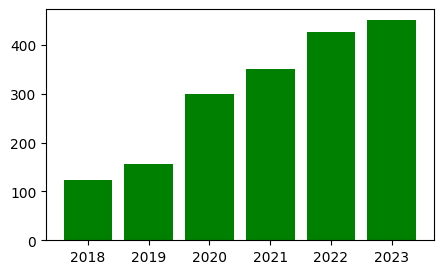

In [9]:
# Note how we conventionally declare this first
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))
years = [str(year) for year in range(2018, 2024)]
visitors = (123, 156, 300, 350, 425, 450)
plt.bar(years, visitors, color="green")

#### 16.2.3 Histograms

Lets use some of our numpy skills gained in Lecture_3.ipynb to plot a standard Gausian distribution:

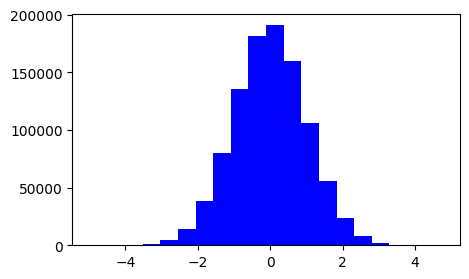

In [10]:
import numpy as np
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))
gaussian_numbers = np.random.normal(size=1000000)
ax1.hist(gaussian_numbers, bins=20, color='blue');

Note how we've added in an extra couple of parametres here. Lets keep going along that theme!

#### 16.2.4

Lets now see an example of 'stacked' plots:

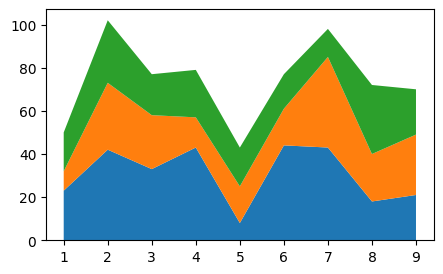

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 3))
y1 = [23, 42, 33, 43, 8, 44, 43, 18, 21]
y2 = [9, 31, 25, 14, 17, 17, 42, 22, 28]
y3 = [18, 29, 19, 22, 18, 16, 13, 32, 21]
idxes = [ 1, 2, 3, 4, 5, 6, 7, 8, 9]
ax1.stackplot(idxes, y1, y2, y3); # What does the semi colon do both above and here?
# What happens here if we _dont_ declare the x-axis values?
# Note: does the ax.stackplot() method always expect x-first?

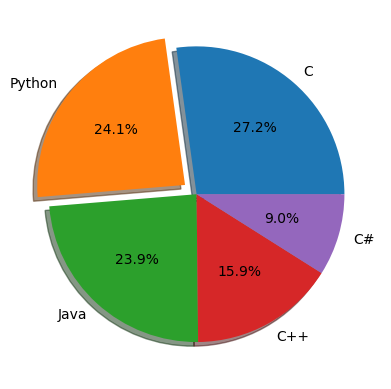

In [12]:
fig, ax1 = plt.subplots() # Why would we not want to declare figsize there?
labels = 'C', 'Python', 'Java', 'C++', 'C#'
sizes = [13.38, 11.87, 11.74, 7.81, 4.41]
explode = (0, 0.1, 0, 0, 0)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0);

### 16.3 Combining Object Orientated plot types

Lets walk now try to stack four of the aforementioned plot types together into one figure, using four different axes:

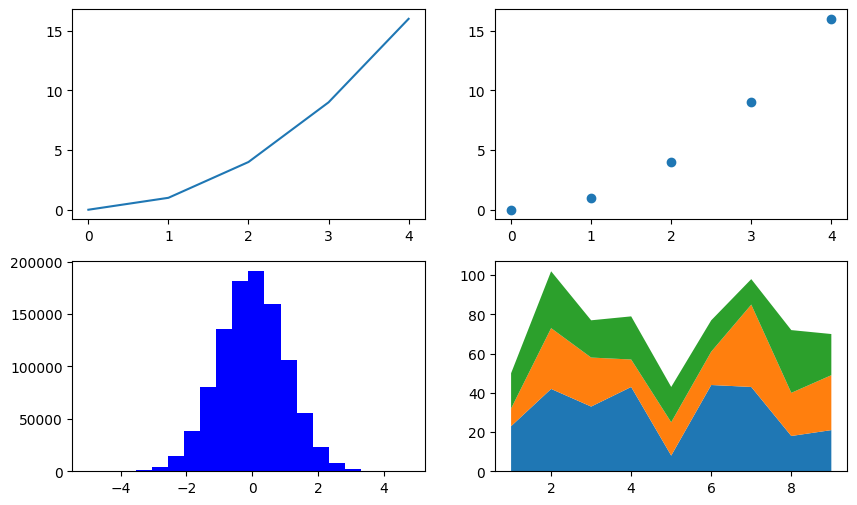

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
ax1.plot([0, 1, 4, 9, 16])
ax2.plot([0, 1, 4, 9, 16], 'o')
ax3.hist(gaussian_numbers, bins=20, color='blue')
ax4.stackplot(idxes, y1, y2, y3); # why do we only need the semi colon here and not above?

### 16.4 A comprehensive example

Lets now see a comprehensive worked example from a famous dataset, which we can then use towards advanced plotting tools (and into our ```statsmodels``` and ```robustipy``` examples.

#### 16.4.1 Getting data and preprocessing it

First, lets re-cap all of the things we learnt previously about requests and pandas. We're going to do this with a 'real world' dataset; the `nlsw88.dta` file from Stata.

The `nlsw88.dta` dataset is another sample dataset frequently used for educational purposes in Stata. This dataset comes from the National Longitudinal Survey of Young Women, specifically the 1988 survey (hence the "88" in the name). It contains data on the labor market experiences of young women in the United States.

Here are some of the key variables that you might find in the `nlsw88.dta` dataset:

* `idcode`: A unique identifier for each individual in the dataset.
* `age`: The age of the respondent.
* `race`: The race of the respondent.
* `msp`: Marital status of the respondent (1 = married, 0 = not married).
* `nevmar`: Never married (1 = never married, 0 = ever married).
* `grade`: Highest grade completed by the respondent.
* `collgrad`: College graduate status (1 = college graduate, 0 = not a college graduate).
* `south`: Whether the respondent lives in the southern United States (1 = yes, 0 = no).
* `smsa`: Whether the respondent lives in a metropolitan area (1 = yes, 0 = no).
* `hours`: Usual hours worked per week.
* `ttl_exp`: Total work experience in years.
* `tenure`: Job tenure in years.
* `union`: Union membership status (1 = union member, 0 = not a union member).
* `wage`: Hourly wage rate.

In [14]:
import os 
import requests
import pandas as pd

def prepare_union(path_to_union):
    """
    Prepare data for union example.

    Reads a Stata file from the given path, processes the data, and prepares it for
    regression analysis. The function creates binary indicators for categorical variables,
    augments the input data with a log-transformed wage variable, and handles missing
    values.

    Parameters
    ----------
    path_to_union : str
        File path to the Stata file containing union data.

    Returns
    ----------
    tuple: A tuple containing the dependent variable ('y'), list of control variables ('c'),
           independent variable ('x'), and the prepared DataFrame ('final_data').

    Raises
    ----------
    FileNotFoundError: If the file specified in 'path_to_union' does not exist.
    """
    union_df = pd.read_stata(path_to_union)
    union_df[['smsa','collgrad','married','union']]= union_df[['smsa',
                                                               'collgrad',
                                                               'married',
                                                               'union']].astype('str')
    union_df.loc[:, 'log_wage'] = np.log(union_df['wage'].copy()) * 100
    union_df = union_df[union_df['union'].notnull()].copy()
    union_df.loc[:, 'union'] = np.where(union_df['union'] == 'union', 1, 0)
    union_df.loc[:, 'married'] = np.where(union_df['married'] == 'married', 1, 0)
    union_df.loc[:, 'collgrad'] = np.where(union_df['collgrad'] == 'college grad', 1, 0)
    union_df.loc[:, 'smsa'] = np.where(union_df['smsa'] == 'SMSA', 1, 0)
    union_df[['smsa', 'collgrad', 'married', 'union']] = union_df[['smsa',
                                                                   'collgrad',
                                                                   'married',
                                                                   'union']].astype('category')
    indep_list = ['hours',
                  'age',
                  'grade',
                  'collgrad',
                  'married',
                  'south',
                  'smsa',
                  'c_city',
                  'ttl_exp',
                  'tenure']
    for var in indep_list:
        union_df = union_df[union_df[var].notnull()]
    y = 'log_wage'
    c = indep_list
    x = 'union'
    final_data = pd.merge(union_df[y],
                          union_df[x],
                          how='left',
                          left_index=True,
                          right_index=True)
    final_data = pd.merge(final_data,
                          union_df[indep_list],
                          how='left',
                          left_index=True,
                          right_index=True)
    final_data = final_data.reset_index(drop=True)
    return final_data


def union_example():
    """ A simple function for estimating the wage premium or
        penalty as a function of the NLSW1988 dataset

        Inputs: None
        Outputs: dependent, control, and independent variable of interest
               : (otherwise known as y, c, and x)
               
    """
    
    # First, lets grab our dataset using the requests library:
    
    def get_nlsw88(url, path, fname):
        url = 'https://www.stata-press.com/data/r10/nlsw88.dta'
        response = requests.get(url, stream=True)
        
        if not os.path.exists(path):
            os.makedirs(path)
            print(f"Directory '{path}' and all required subdirectories created.")
        else:
            print(f"Directory '{path}' already exists.")
   
        if response.status_code == 200:
            with open(os.path.join(path, fname), 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"File downloaded successfully and saved as {fname}")
        else:
            print(f"Failed to download the file. Status code: {response.status_code}")
    
    get_nlsw88('https://www.stata-press.com/data/r10/nlsw88.dta',
               os.path.join('data', 'input'), 'nlsw88.dta')
    
    # Then, lets make a simple function call which prepares this data akin with the best
    # practice econometric\statistical literature.
    
    data = prepare_union(os.path.join('data',
                                      'input',
                                      'nlsw88.dta'
                                     )
                        )
    return data

data = union_example()

Directory 'data/input' already exists.
File downloaded successfully and saved as nlsw88.dta


#### 16.4.2 Previewing data

What does this data look like?

In [15]:
data.head(5)

,log_wage,union,hours,age,grade,collgrad,married,south,smsa,c_city,ttl_exp,tenure
0,246.292740,1,48.0,37,12.0,0,0,0,1,0,10.333334,5.333333
1,185.644852,1,40.0,37,12.0,0,0,0,1,1,13.621795,5.250000
2,161.277695,0,40.0,42,12.0,0,0,0,1,1,17.730770,1.250000
3,220.097443,1,42.0,43,17.0,1,1,0,1,0,13.211537,1.750000
4,208.985352,0,48.0,42,12.0,0,1,0,1,0,17.820513,17.750000


#### 16.4.3 Making a simple matplotlib figure

Lets now make a simple 1x2 matplotlib figure from this dataset:

<Axes: ylabel='Frequency'>

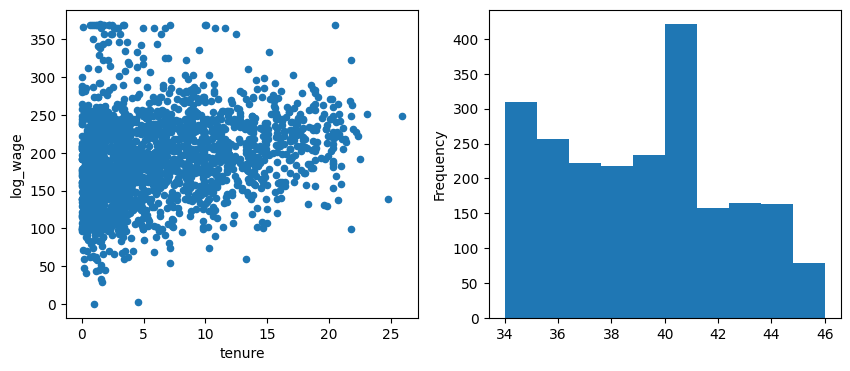

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
data[['log_wage', 'tenure']].plot(y='log_wage', x='tenure', ax=ax1, kind='scatter')
data['age'].plot(ax=ax2, kind='hist')

#### 16.4.3 Figure Aesthetics

Lets now do everything we can do to make this plot as aesthetically pleasing as possible

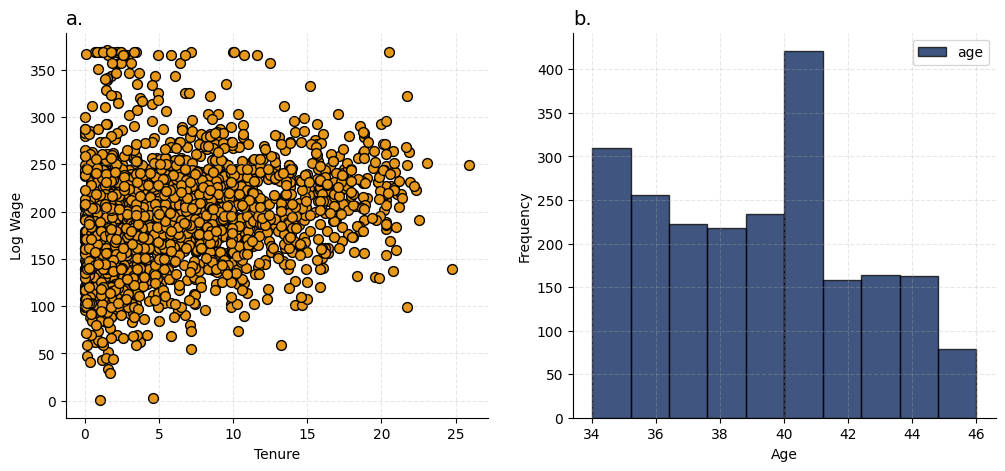

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = ['#001c54', '#E89818', '#8b0000']
    
data[['log_wage', 'tenure']].plot(y='log_wage',
                                  x='tenure',
                                  ax=ax1,
                                  kind='scatter',
                                  s=50,
                                  edgecolor=(0, 0, 0, 1),
                                  color=colors[1],
                                 )
data['age'].plot(ax=ax2,
                 kind='hist',
                 edgecolor='k',
                 color=colors[0],
                 alpha=0.75,
                 legend=True)

ax1.set_title('a.', loc='left', fontsize=14)
ax2.set_title('b.', loc='left', fontsize=14)

ax1.grid(which="both", linestyle='--', alpha=0.3)
ax2.grid(which="both", linestyle='--', alpha=0.3)

ax1.set_ylabel('Log Wage')
ax2.set_ylabel('Frequency')

ax1.set_xlabel('Tenure')
ax2.set_xlabel('Age')

import seaborn as sns
sns.despine()

In [18]:
nejm = pd.read_csv(os.path.join(os.getcwd(),
                                '..',
                                'Data',
                                'metadata_nejm.csv')
                  )
print(nejm.head(2))

print('*'*20)
nature = pd.read_csv(os.path.join(os.getcwd(),
                     '..',
                     'Data',
                     'metadata_nature.csv')
                    )
print(nature.head(2))

  journal  random_state  n_neighbors nr_topics  topics_count  outliers_count  \
0    nejm     415319416           10      auto           189            3882   
1    nejm     778336475           10      auto           203            3680   

   silhouette_score  
0          0.196835  
1          0.201611  
********************
  journal  random_state  n_neighbors nr_topics  topics_count  outliers_count  \
0  nature     415319416           10      auto           984           43441   
1  nature     778336475           10      auto            33           42715   

   silhouette_score  
0          0.220126  
1         -0.562845  


NEJM mean number of topics: 173.534
NEJM min number of topics: 5
NEJM max number of topics: 267
Nature mean number of topics: 173.534
Nature min number of topics: 5
Nature max number of topics: 267


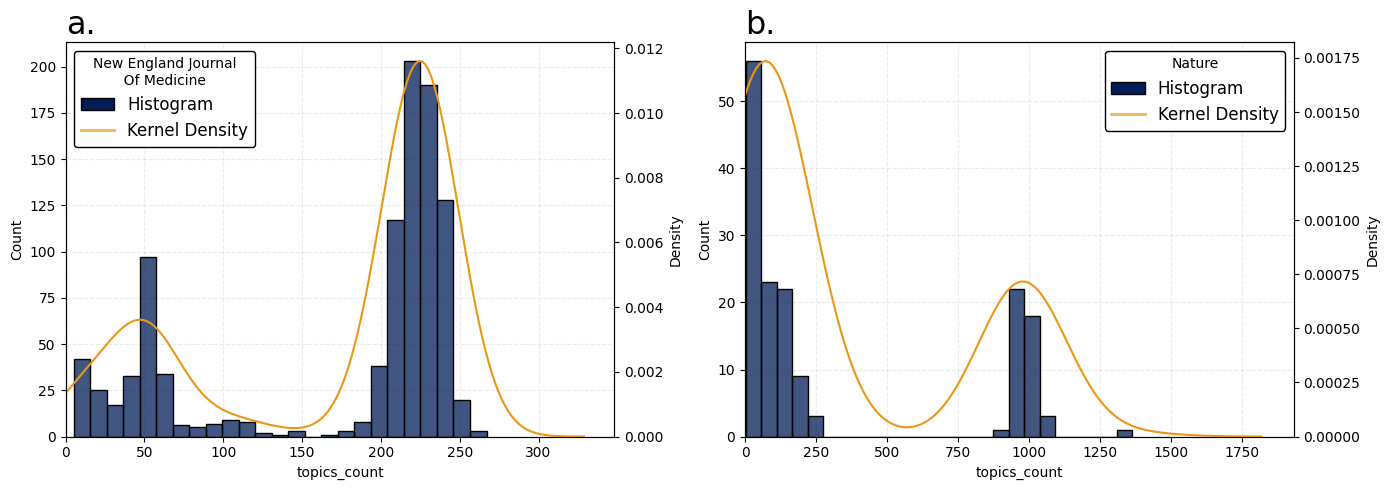

In [19]:
def plot_topics_barplot(nejm, nature, figure_path):
    fig, ((ax1, ax2)
          ) = plt.subplots(1, 2, figsize=(14, 5))
    colors = ['#001c54', '#E89818']
    nbins = 25
    sns.histplot(nejm['topics_count'],
                 ax=ax1,
                 color=colors[0],
                 bins=nbins)
    ax1_twin = ax1.twinx()
    sns.kdeplot(nejm['topics_count'], ax=ax1_twin, color=colors[1])
                       
    sns.histplot(nature['topics_count'],
                 ax=ax2,
                 color=colors[0],
                 bins=nbins)
    ax2_twin = ax2.twinx()
    sns.kdeplot(nature['topics_count'], ax=ax2_twin, color=colors[1])
    ax1.set_title('a.', loc='left', fontsize=23)
    ax2.set_title('b.', loc='left', fontsize=23)
    ax1.set_xlim(0, ax1.get_xlim()[1])
    ax2.set_xlim(0, ax2.get_xlim()[1])
    ax1.grid(which="both", linestyle='--', alpha=0.25)
    ax2.grid(which="both", linestyle='--', alpha=0.25)
    ax1.set_axisbelow(True)
    ax2.set_axisbelow(True)
    
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    
    legend_elements1 = [
        Patch(facecolor=colors[0], edgecolor=(0, 0, 0, 1),
              label=r'Histogram'),
        Line2D([0], [0], color=colors[1], lw=2, linestyle='-',
               label=r'Kernel Density', alpha=0.7)
    ]
    ax1.legend(handles=legend_elements1, loc='upper left', frameon=True,
               fontsize=12, framealpha=1, facecolor='w',
               edgecolor=(0, 0, 0, 1), ncols=1, title='New England Journal\n       Of Medicine'
               )
    ax2.legend(handles=legend_elements1, loc='upper right', frameon=True,
               fontsize=12, framealpha=1, facecolor='w',
               edgecolor=(0, 0, 0, 1), ncols=1, title='Nature'
               )
    print(f"NEJM mean number of topics: {nejm['topics_count'].mean()}")
    print(f"NEJM min number of topics: {nejm['topics_count'].min()}")
    print(f"NEJM max number of topics: {nejm['topics_count'].max()}")
    print(f"Nature mean number of topics: {nejm['topics_count'].mean()}")
    print(f"Nature min number of topics: {nejm['topics_count'].min()}")
    print(f"Nature max number of topics: {nejm['topics_count'].max()}")
    plt.tight_layout()
    plt.savefig(figure_path + '.pdf')
    plt.savefig(figure_path + '.svg')
    plt.savefig(figure_path + '.png', dpi=400)

    
plot_topics_barplot(nejm, nature, '../Figures/topic_modelling')

### 16.5 Colours and figure types

I have some major pieces of advice for people who want to begin to plot production quality figures.

* **Always** try to produce .pdf or .svg figures which are 'vector graphics' and therefore lossless. Avoid .pngs wherever possible.
* **Always** try to find a consistent colour palette for your paper which works on aggregate.
* **Always** try to include in your figures as much useful information as possible to make the point which your paper needs to make, without ever either including too much, or too many figures.

### 16.6 Your Turn!

Find another variable in the nlsw88 file that can be visualised. Visualise it, practicing all of the plotting functions we've learnt about above.

## 17. StatsModels

Statsmodels is a Python library designed for statistical modeling, hypothesis testing, and data exploration. It provides classes and functions for estimating and testing statistical models, including linear and logistic regression, time series analysis, and generalized linear models. The library offers comprehensive tools for statistical analysis, including support for univariate and multivariate models, descriptive statistics, and visualization capabilities.

Statsmodels integrates well with other Python libraries like NumPy, SciPy, and pandas, enabling users to manipulate data efficiently and perform complex analyses. Its API is designed to be user-friendly, allowing easy access to a wide range of statistical tests and model diagnostics. With robust documentation and an active community, Statsmodels is a valuable resource for data scientists, economists, and researchers looking to perform rigorous statistical analyses and build predictive models in Python.

Lets use the nlsw88 data to show a key example of it:

Import necessary libraries

In [20]:
import statsmodels.api as sm

Load the dataset

In [21]:
data = union_example()

Directory 'data/input' already exists.
File downloaded successfully and saved as nlsw88.dta


Display the first few rows of the dataset. This helps us understand the structure and variables in the dataset


In [22]:
print(data.head())

     log_wage union  hours  age  grade collgrad married  south smsa  c_city  \
0  246.292740     1   48.0   37   12.0        0       0      0    1       0   
1  185.644852     1   40.0   37   12.0        0       0      0    1       1   
2  161.277695     0   40.0   42   12.0        0       0      0    1       1   
3  220.097443     1   42.0   43   17.0        1       1      0    1       0   
4  208.985352     0   48.0   42   12.0        0       1      0    1       0   

     ttl_exp     tenure  
0  10.333334   5.333333  
1  13.621795   5.250000  
2  17.730770   1.250000  
3  13.211537   1.750000  
4  17.820513  17.750000  


### 17.1 OLS Modelling

Define the dependent and independent variables

In [23]:
X = data[['union',
          'hours',
          'age',
          'tenure']]
y = data['log_wage']

Adding a constant allows us to include the intercept in our regression model

In [24]:
X = sm.add_constant(X)

We use the Ordinary Least Squares (OLS) method to fit the model

In [25]:
model = sm.OLS(y, X).fit()

The summary provides detailed statistics about the regression results, including coefficients, R-squared, p-values, etc.

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     82.04
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           4.98e-65
Time:                        05:11:46   Log-Likelihood:                -12009.
No. Observations:                2225   AIC:                         2.403e+04
Df Residuals:                    2220   BIC:                         2.406e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        166.0892     15.207     10.922      0.0

more extensions of what i can do with this model.summary variable

### 17.2. Residual visualisation

We can also assess the validity of our model, with a couple of matplotlib figures. A quick note here is on the importance of satisfying the Gauss-Markov assumptions (which are often violated by many applied econometric models):

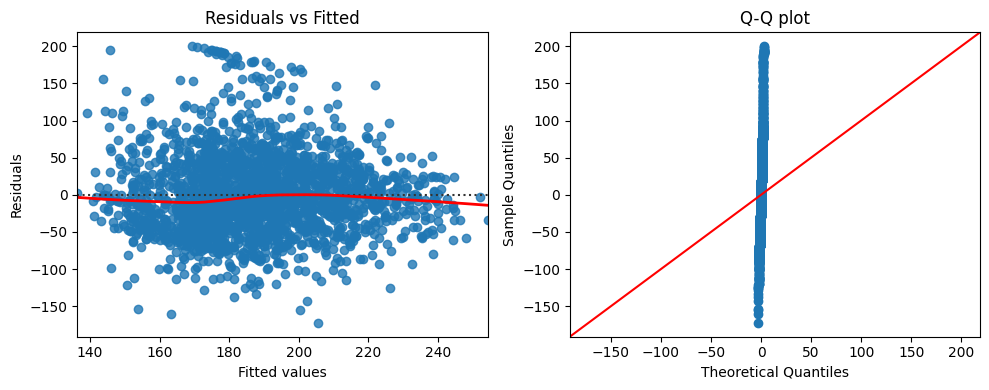

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Residuals vs Fitted plot
sns.residplot(x=model.fittedvalues,
              y=model.resid,
              lowess=True,
              line_kws={'color': 'red', 'lw': 2},
              ax=axs[0])
axs[0].set_xlabel('Fitted values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals vs Fitted')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1])
axs[1].set_title('Q-Q plot')

plt.tight_layout()
plt.show()


### 17.3 Prediction of new depedent variable data

We can also predict new dependent variable data (e.g. $\hat{y}$):

In [28]:
new_data = pd.DataFrame({
    'const': [1],
    'age': [30],
    'hours': [35],
    'tenure': [5],
    'union': [1]
}
)
predicted_wage = model.predict(new_data)
print("Predicted wage:", predicted_wage[0])

Predicted wage: 666.3033305117134


#### 17.4 Evaluating the model

You can evaluate the model performance using different metrics:

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y, model.fittedvalues)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y, model.fittedvalues)
print("R-squared:", r2)

Mean Squared Error: 2855.0313998446286
R-squared: 0.12878462706099203


#### 17.5 Model Comparison

We can also compare models with all our favourite information criteria:

In [30]:
X2 = data[['union', 'age']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

print("AIC of model 1:", model.aic)
print("AIC of model 2:", model2.aic)

AIC of model 1: 24028.241290258964
AIC of model 2: 24266.758169943627


### 18. RobustiPy

Lets now introduce [RobustiPy!](https://robustipy.github.io/)

RobustiPy is an efficient multiversal library with model selection, averaging, resampling and out-of-sample analysis. It analyses various output spaces, in addition to the control variable space (e.g. multiple dependent variables, estimands of interest, etc). Developed for Python and R, it is designed to be both accessible and computationally efficient.

Lets install that library as described in the [github page](https://github.com/RobustiPy/robustipy) for it, then run through some of the empirical and simulated examples within the repositories there following a short presentation.

## 19. Scikitlearn 

**Overview:**

* ```scikit-learn``` is a free, open-source machine learning library for Python. It provides simple and efficient tools for data mining and data analysis. Built on NumPy, SciPy, and matplotlib.

**Features:**

* *Classification*: Identifying which category an object belongs to (e.g., spam detection).
* *Regression:* Predicting a continuous-valued attribute (e.g., stock prices).
* *Clustering:* Grouping similar objects into sets (e.g., customer segmentation).
* *Dimensionality Reduction:* Reducing the number of random variables (e.g., PCA).
* *Model Selection:* Comparing, validating, and choosing parameters and models.
* *Preprocessing:* Feature extraction and normalization.

**Ease of Use:**

Well-documented and easy to use API. Extensive user guide and examples for beginners and advanced users.

**Performance:**

* Designed to be efficient with high performance on many real-world tasks.
* Integration with other scientific Python libraries like NumPy and pandas.

**Community:**

* Large and active community contributing to continuous improvement.
* Frequent updates and new releases with bug fixes and new features.

**Applications:**

* Used in academia and industry for tasks such as predictive analytics, computer vision, natural language processing, and more.

**Integration:

Compatible with other machine learning libraries like TensorFlow and Keras for more complex models.
Scikit-learn is a versatile and powerful tool widely used in the machine learning community due to its simplicity and effectiveness.

### 19.1 Frontloading library imports

Lets now try to be as professional as possible by `frontloading' library imports:

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

### 19.2 Loading data 

Lets load a commonly used ML dataset: the `iris` datset created by Fisher. The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

In [32]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Display the first five rows of the dataset
print("Features:\n", X[:5])
print("\nLabels:\n", y[:5])

Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Labels:
 [0 0 0 0 0]


### 19.3 Train and test splits

Lets now split the dataset into four components: X_train, X_test, y_train, y_test. This is *extremely* common for ML pipelines.
    

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 19.4 Standardisation

Lets now standardize (subtract the mean, divide by the variance) the features or our `iris` dataset.

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 19.5 Logistic Regressions

Lets now train a logistic regression classifier

In [35]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

### 19.6 Predictions

Lets now make predictions and evaluate the predictions created by a logistic regression model

In [36]:
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Lets now evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# And display classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 1.00

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 19.6.1. Querying Predictions

Does this look right? If so, why, if not, why not?

### 19.6.2 Random Forest

Lets now train a Random Forest model:

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Lets now make predictions and evaluate the random forest model

In [38]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Display classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.00

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 19.7 Classifications

Lets now only use the first two features for visualization purposes

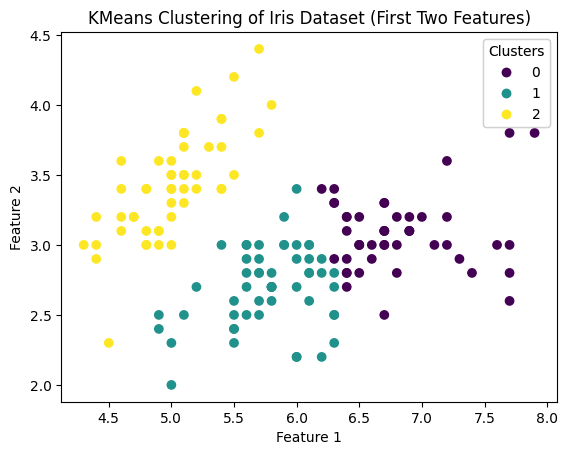

In [39]:
X_cluster = X[:, :2]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_cluster)

# Plot the clustering results using object-oriented notation
fig, ax = plt.subplots()
scatter = ax.scatter(X_cluster[:, 0], X_cluster[:, 1], c=y_kmeans, cmap='viridis')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('KMeans Clustering of Iris Dataset (First Two Features)')

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

## 20. NLTK

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

NLTK needs to be installed in your Python environment if it's not already available. This step ensures you have access to NLTK's functionalities.

In [40]:
!pip install nltk

Import NLTK to start using its various modules and functions for natural language processing tasks.

In [41]:
import nltk

NLTK provides datasets and models that are essential for its operations. Downloading these resources ensures NLTK functions correctly.

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/porco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenization is the process of breaking down text into meaningful units, such as words or sentences. NLTK's word_tokenize() function performs this task.

In [43]:
from nltk.tokenize import word_tokenize

text = "NLTK is a powerful tool for text processing."
tokens = word_tokenize(text)
tokens

['NLTK', 'is', 'a', 'powerful', 'tool', 'for', 'text', 'processing', '.']

Stopwords are common words (e.g., "the", "is", "and") that are often filtered out in text analysis because they carry little meaningful information.

In [44]:
from nltk.corpus import stopwords

filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
filtered_tokens

['NLTK', 'powerful', 'tool', 'text', 'processing', '.']

Stemming reduces words to their root or base form. It helps in normalizing words for better analysis by stripping affixes.

In [45]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
stemmed = [porter.stem(word) for word in filtered_tokens]
stemmed

['nltk', 'power', 'tool', 'text', 'process', '.']

Part-of-Speech (POS) tagging labels words in a text with their corresponding part of speech (e.g., noun, verb, adjective).

In [46]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

pos_tagged = pos_tag(filtered_tokens)
pos_tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/porco/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('NLTK', 'NNP'),
 ('powerful', 'JJ'),
 ('tool', 'NN'),
 ('text', 'NN'),
 ('processing', 'NN'),
 ('.', '.')]

Named Entity Recognition (NER) identifies named entities such as names of persons, organizations, or locations in text.

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/porco/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/porco/nltk_data...
[nltk_data]   Package words is already up-to-date!


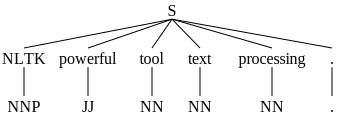

In [47]:
from nltk import ne_chunk
!pip install svgling
nltk.download('maxent_ne_chunker')
nltk.download('words')
    
ner_tagged = ne_chunk(pos_tagged)
ner_tagged

Frequency distribution counts the occurrences of words in a text and is useful for understanding the most common terms.

In [48]:
from nltk import FreqDist

freq_dist = FreqDist(filtered_tokens)
freq_dist.most_common(5)

[('NLTK', 1), ('powerful', 1), ('tool', 1), ('text', 1), ('processing', 1)]

A word cloud is a visual representation of word frequency where more frequent words appear larger.

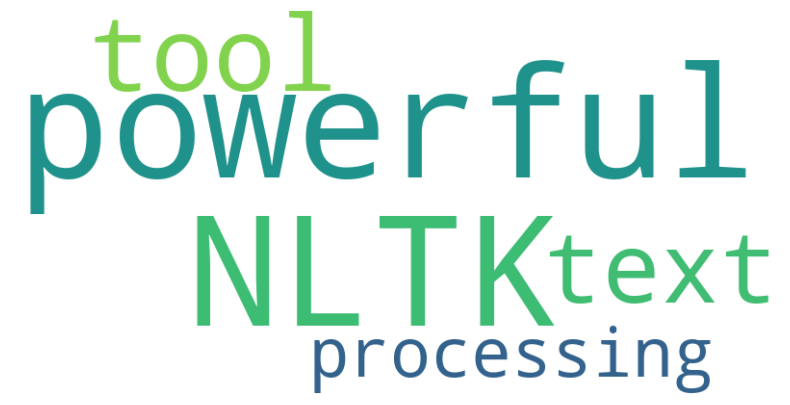

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment analysis assesses the sentiment expressed in a text, such as positive, negative, or neutral.

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_score = sid.polarity_scores(text)
sentiment_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/porco/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}

Collocations are pairs or groups of words that often occur together in a text and can provide valuable insights into the relationships between words.

In [51]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

# Create a BigramCollocationFinder from filtered tokens
finder = BigramCollocationFinder.from_words(filtered_tokens)

# Use likelihood ratio as the association measure and find top collocations
collocations = finder.nbest(BigramAssocMeasures.likelihood_ratio, 5)
collocations

[('NLTK', 'powerful'),
 ('powerful', 'tool'),
 ('processing', '.'),
 ('text', 'processing'),
 ('tool', 'text')]

Concordance helps analyze how a word is used in different contexts in a text. In this cell:

* `Text(filtered_tokens)` converts filtered_tokens into an NLTK Text object.
* `concordance('NLTK', lines=5)` searches for occurrences of the word 'NLTK' in the text and displays 5 lines of context around each occurrence.

In [52]:
from nltk.text import Text

# Convert filtered tokens to NLTK Text object
nltk_text = Text(filtered_tokens)

# Find concordance for the word 'NLTK'
concordance_results = nltk_text.concordance('NLTK', lines=5)
concordance_results

Displaying 1 of 1 matches:
 NLTK powerful tool text processing .


## 21. Your Projects

If there is time at the end of the course, I'd like to to guide students in the developments of _their_ projects which have inspired them to join the course. Examples might include structured or unstructured data.

## 22 Further study (and potentially a followup class!)

1. Advanced Python Programming
    * Object-oriented programming (OOP) principles
    * Decorators and context managers
    * Generators and iterators
    * Functional programming techniques

2. Data Manipulation and Cleaning
    * Advanced techniques using pandas
    * Efficient data wrangling with Dask and Vaex
    * Handling missing data and outliers
    * Data transformation and feature engineering

3. Statistical Analysis and Hypothesis Testing
    * Advanced statistical methods
    * Bayesian statistics
    * Bootstrapping and resampling methods
    * Hypothesis testing and confidence intervals

4. Machine Learning Algorithms
    * In-depth study of algorithms like SVM, XGBoost, and neural networks
    * Ensemble methods (bagging, boosting, stacking)
    * Hyperparameter tuning and model optimization
    * Handling imbalanced datasets

5. Deep Learning
    * Neural network architectures (CNNs, RNNs, LSTMs)
    * Transfer learning and fine-tuning pre-trained models
    * TensorFlow and PyTorch frameworks
    * Implementing and training complex models

6. Big Data Technologies
    * Working with Apache Spark using PySpark
    * Scalable data processing
    * Integration with big data ecosystems (Hadoop, Kafka)
    * Real-time data streaming

7. Data Visualization
    * Advanced plotting with Matplotlib and Seaborn
    * Interactive visualizations with Plotly and Bokeh
    * Custom dashboards with Dash or Streamlit
    * Visualizing complex data sets and results

8. Natural Language Processing (NLP)
    * Text preprocessing and vectorization techniques
    * Sentiment analysis and topic modeling
    * Sequence-to-sequence models and transformers
    * Applications of NLP in real-world scenarios

9. Model Deployment and Productionization
    * Creating RESTful APIs with Flask or FastAPI
    * Model deployment on cloud platforms (AWS, GCP, Azure)
    * Continuous Integration/Continuous Deployment (CI/CD) pipelines
    * Monitoring and maintaining deployed models